# Evolving Game Strategies - Preliminary Report
Authors: Subhash Gubba and Kai Levy
## Abstract
We will investigate evolutionary game theory strategies and their implementations to see which ones emerge dominant. We intend to use agent-based modeling (with the help of the Mesa python ABM library) to investigate it. Our first approach will be to mimic the “Evolution of Ethnocentrism” experiment and try various ways to extend it in small ways. A possible reach extension of this project could include implementing a genetic algorithm to see which aspects of strategies might appear in successful ones.

## Experiment 1 - General Implementation
Here we attempt to replicate the agent-based ethnicity model proposed by Hartshorn, Kaznatcheev, and Thomas Shultz.

**Q** - Does our implementation of the model perform similarly to the original model? Does the number of agents for each behavior over time resemble that of the original model?

**M** - We utilize the Mesa ABM library to create our framework for the agent-based model. We implement the steps of the model including reproduction and death of agents. We then run the model and collect the data for analysis.

**R** - see the results below:

In [1]:
import pandas as pd
from itertools import chain, combinations
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
sys.path.append(os.path.abspath('../code'))
from ethno import EthnoModel, EthnoAgent, BEHAVIOR_KEY

We begin by initializing the model with all behaviors ("Ethnocentric","Humanitarian", "Selfish", "Traitor") and run for around 500 steps.

In [2]:
m = EthnoModel(5,50,50,1,0.005, [0b00, 0b01, 0b10, 0b11], max_iters=2000)

In [3]:
m.run_model()

In [4]:
data = m.datacollector.get_model_vars_dataframe()

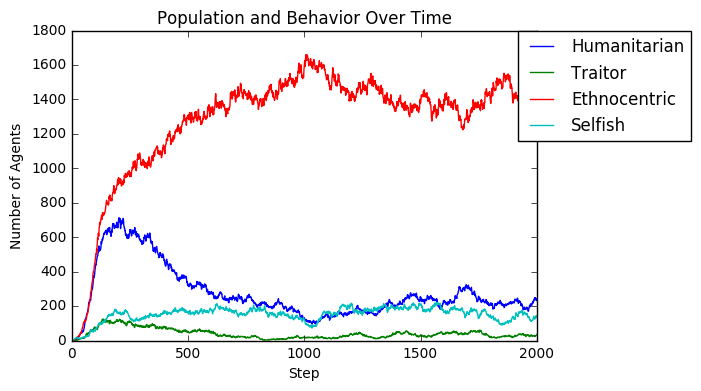

In [7]:
ax = data[["Humanitarian","Traitor", "Ethnocentric", "Selfish"]].plot()
ax.set_title("Population and Behavior Over Time")
ax.set_xlabel("Step")
ax.set_ylabel("Number of Agents")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

The original experiment that we recreated:
![Original Experiment Behavior Timeseries](./images/jasss_report_timescale.png)

**I** - The results very closely resemble that of the original model's findings: Ethnocentrism and Humanitarianism are the leaders in the early stages, with ethnocentrism dominating by the 1000th step. Traitorish is the worst performing trait, then Selfish, but neither of them die out completely.

## Experiment 2 - Varying Behaviors Validation
The original paper explores how different combinations of behaviors in the model effect the numbers.

**Q** - Does our model perform the same way the original model does when behaviors are variably included?

**M** - We use the same model implemented, and run it for 2000 steps for each combination of variables, and then observe the average behavior counts for the last 100 steps of the simulation.

**R** - see the results below. This first table is from the original paper. The second table is the DataFrame that depicts our results.

#### Table from Paper - Varied Behavior Inclusion
![Allowed Behavior Mean Agent Counts](./images/meanagentstable.PNG)

A powerset defines all the combinations of behaviors we want to run.

In [7]:
def powerset(orig_list):
    new_list = list([y for y in orig_list])
    return [list(x) for x in list(chain.from_iterable(combinations(new_list, item) for item in range(1,len(new_list)+1)))]

In [8]:
behavior_combs = powerset([0b00,0b01,0b10,0b11])
print(behavior_combs)

[[0], [1], [2], [3], [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3], [0, 1, 2, 3]]


In [9]:
behavior_labels = [[BEHAVIOR_KEY[y] for y in x] for x in behavior_combs]

In [10]:
behavior_labels

[['S'],
 ['T'],
 ['E'],
 ['H'],
 ['S', 'T'],
 ['S', 'E'],
 ['S', 'H'],
 ['T', 'E'],
 ['T', 'H'],
 ['E', 'H'],
 ['S', 'T', 'E'],
 ['S', 'T', 'H'],
 ['S', 'E', 'H'],
 ['T', 'E', 'H'],
 ['S', 'T', 'E', 'H']]

In [11]:
behavior_counts_dict = {}
counter = 0
for b_list in behavior_combs:
    m = EthnoModel(5,50,50,1,0.005, b_list, max_iters=2000)
    m.run_model()
    data = m.datacollector.get_model_vars_dataframe()
    S_mean_count = data.Selfish[1900:].get_values().mean()
    T_mean_count = data.Traitor[1900:].get_values().mean()
    E_mean_count = data.Ethnocentric[1900:].get_values().mean()
    H_mean_count = data.Humanitarian[1900:].get_values().mean()
    behavior_counts_dict[''.join(behavior_labels[counter])] = [S_mean_count,T_mean_count,E_mean_count,H_mean_count]
    counter+=1
    

In [21]:
behavior_counts_dict

{'E': [0.0, 0.0, 1853.8415841584158, 0.0],
 'EH': [0.0, 0.0, 1646.5049504950496, 233.1881188118812],
 'H': [0.0, 0.0, 0.0, 1905.7920792079208],
 'S': [1493.7623762376238, 0.0, 0.0, 0.0],
 'SE': [196.85148514851485, 0.0, 1640.3762376237623, 0.0],
 'SEH': [278.63366336633663, 0.0, 1264.2475247524753, 263.15841584158414],
 'SH': [83.900990099009903, 0.0, 0.0, 1814.7326732673268],
 'ST': [1291.7425742574258, 213.49504950495049, 0.0, 0.0],
 'STE': [252.16831683168317, 44.950495049504951, 1519.049504950495, 0.0],
 'STEH': [154.990099009901,
  30.217821782178216,
  1428.920792079208,
  216.24752475247524],
 'STH': [162.66336633663366, 132.55445544554456, 0.0, 1575.5247524752476],
 'T': [0.0, 1681.4455445544554, 0.0, 0.0],
 'TE': [0.0, 7.9108910891089108, 1838.7722772277227, 0.0],
 'TEH': [0.0, 34.990099009900987, 1567.5742574257426, 255.8118811881188],
 'TH': [0.0, 178.33663366336634, 0.0, 1709.9603960396039]}

We now have a set of results for the mean counts of each behavior. We can also compare this with the original table.

In [18]:
behavior_counts_table = pd.DataFrame(behavior_counts_dict).transpose()
behavior_counts_table.columns = ['S','T','E','H']

In [42]:
newtemp = behavior_counts_table[['E','H','S','T']]
newtemp.reindex(['STEH','STH','TEH','SEH','STE','ST','TH','SH','TE','SE','EH','E','H','S','T'])

,E,H,S,T
STEH,1428.920792,216.247525,154.990099,30.217822
STH,0.000000,1575.524752,162.663366,132.554455
TEH,1567.574257,255.811881,0.000000,34.990099
SEH,1264.247525,263.158416,278.633663,0.000000
STE,1519.049505,0.000000,252.168317,44.950495
ST,0.000000,0.000000,1291.742574,213.495050
TH,0.000000,1709.960396,0.000000,178.336634
SH,0.000000,1814.732673,83.900990,0.000000
TE,1838.772277,0.000000,0.000000,7.910891
SE,1640.376238,0.000000,196.851485,0.000000


In [44]:
newtemp['E %'] = (newtemp['E']/newtemp.sum(1,0))*100
newtemp['H %'] = (newtemp['H']/newtemp.sum(1,0))*100
newtemp['S %'] = (newtemp['S']/newtemp.sum(1,0))*100
newtemp['T %'] = (newtemp['T']/newtemp.sum(1,0))*100
newtemp[['E %','H %','S %','T %']].reindex(['STEH','STH','TEH','SEH','STE','ST','TH','SH','TE','SE','EH','E','H','S','T'])

,E %,H %,S %,T %
STEH,78.067053,11.331095,8.073350,1.567438
STH,0.000000,84.219217,8.320539,6.751676
TEH,84.351824,13.167663,0.000000,1.788955
SEH,70.001096,14.027330,14.741991,0.000000
STE,83.640348,0.000000,13.273353,2.349638
ST,0.000000,0.000000,85.816522,13.418465
TH,0.000000,90.555690,0.000000,9.012123
SH,0.000000,95.580981,4.207220,0.000000
TE,99.571616,0.000000,0.000000,0.406467
SE,89.285406,0.000000,10.218019,0.000000


We can look at the the two tables to see what percentages of the total population they were, and then observe the differences in those percentages.

In [56]:
orig_model_results = {'E': [100.0, 0.0, 0.0, 0.0],
 'EH': [84.19, 15.81, 0.0, 0.0],
 'H': [0.0, 100.0, 0.0, 0],
 'S': [0.0, 0.0, 100.0, 0.0],
 'SE': [90.1, 0.0, 9.99, 0.0],
 'SEH': [74.97, 17.17, 7.86, 0.0],
 'SH': [0.0, 91.39, 8.61, 0.0],
 'ST': [0.0, 0.0, 66.12, 33.88],
 'STE': [89.08, 0.0, 8.88, 2.04],
 'STEH': [74.78,14.48,7.77,2.97],
 'STH': [0.0, 83.77, 7.04, 9.19],
 'T': [0.0, 0.0, 0.0, 100.0],
 'TE': [97.91, 0.0, 0.0, 2.01],
 'TEH': [82.35, 15.25, 0.0, 2.41],
 'TH': [0.0, 88.72, 0.0, 11.28]}

orig_model_table = pd.DataFrame(orig_model_results).transpose()
orig_model_table.columns = ['E %', 'H %', 'S %', 'T %']
orig_model_table.reindex(['STEH','STH','TEH','SEH','STE','ST','TH','SH','TE','SE','EH','E','H','S','T'])
orig_model_table - newtemp[['E %','H %','S %','T %']]

,E %,H %,S %,T %
E,0.000000,0.000000,0.000000,0.000000
EH,-3.404351,3.956718,0.000000,0.000000
H,0.000000,0.000000,0.000000,0.000000
S,0.000000,0.000000,0.000000,0.000000
SE,0.814594,0.000000,-0.228019,0.000000
SEH,4.968904,3.142670,-6.881991,0.000000
SH,0.000000,-4.190981,4.402780,0.000000
ST,0.000000,0.000000,-19.696522,20.461535
STE,5.439652,0.000000,-4.393353,-0.309638
STEH,-3.287053,3.148905,-0.303350,1.402562


**I** - Our results above seem to match relatively closely with the table from the paper. The differences in percentages depicted above are not very large with the exception of the simulation where only selfish and traitorous behvaiors were included. Judging based on this fact, it should be safe to say that our implementation of the model is accurate to that of the original one.

![Allowed Behavior Mean Agent Counts](./images/meanagentstable.PNG)

### Additional extensions
We have not yet designed further experiments, because we would like to extend the model in ways that the papers we referenced have not tried yet. Below are a few ideas that we have brainstormed about potential model extensions:
- Allowing for "alliances", agents which will cooperate with some agents of other tags.
- Making tags more ambiguous, agents cannot tell for certain what tag another agent exhibits
- Iterative game playing, with more complex strategies
- Aging and lifespan (not a complete extension, but may be useful)

### Learning Goals

#### Subhash:
I would like to gain a better understand of how agent based models are implemented and evolved. I want to learn what types of evaluation metrics matter for our experiments and explore how this project could be applied to other fields as well.

Working through this implementation and performing the validation experiments has helped me achieve this goal. I have yet to see how we might apply this to other fields.

#### Kai:
I have made progress towards my learning goal in the process of implementing the ethnocentrism model. The experience of reading through a paper in order to recreate it's results was very valuable for me.

For the rest of the project, I would like to do more exploration with extensions (as opposed copying existing experiments). In particular, I want to come up interesting extensions that are not so complex that they muddle insights. I want to ask questions that can be compared to human behavior (like original question of ethnocentrism), and hopefully answer them with experiments in our model.

## Bibliography
- Ross Hammond, Robert Axelrod. [“The Evolution of Ethnocentrism” (2006).](
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.576.4696&rep=rep1&type=pdf.)
  *Investigates prisoner’s dilemma on a grid, with four basic tags and linked behaviors. Simulates the agents by playing the game one-off, with results having implications on individual reproductivity. Demonstrates that in-group favoritism can emerge as beneficial for groups, even when individual cooperation is costly.*


- Max Hartshorna, Artem Kaznatcheeva, Thomas Shultz. [“The Evolutionary Dominance of Ethnocentric Cooperation” (2013).](http://jasss.soc.surrey.ac.uk/16/3/7.html)
*Replicates the experiment from Hammond, Axelrod (2006). Investigates different “worlds” where certain behaviors may or may not be present, and demonstrates that humanitarianism becomes dominant in the absence of ethnocentrism, but ethnocentrism dominates otherwise.*


- Jennifer Golbeck. ["Evolving Strategies for the Prisoner’s Dilemma" (2002).](https://www.cs.umd.edu/~golbeck/downloads/JGolbeck_prison.pdf)
*This paper applies a genetic algorithm to the Prisoner’s Dilemma and evaluates the resulting winning strategies against two well-known effective strategies: Pavlov and Tit-for-tat. Each round of the algorithm is a series of multiple games with randomly strategized players, and the emerging strategies show aspects of the two control strategies.*


- Wikipedia. ["List of games in game theory".](https://en.wikipedia.org/wiki/List_of_games_in_game_theory)
*Contains a list of games for which we may apply agent-based models and evolutionary strategies in game theory.*